# Examen Deep Learning M2 SIR UADB

### Papa Sidy Mactar TRAORE M2 SI

## 1. Questions de cours

- Présentation des concepts de base des CNN

Le réseau de neurones convolutifs (CNN) est l'une des méthodes d'apprentissage profond les plus connues. Ces réseaux traitent principalement des images. Leur approche est similaire aux méthodes d'apprentissage supervisé traditionnelles : recevoir des images en entrée, détecter automatiquement les caractéristiques (propriétés) de chaque image, puis entraîner un classificateur sur celle-ci. L'architecture spécifique du réseau permet d'extraire des fonctionnalités de complexité variable, des plus simples aux plus complexes. L'extraction et la priorisation automatiques de fonctionnalités adaptées à un problème donné constituent l'un des avantages des réseaux de neurones convolutifs.

- Architecture typique d'un CNN

L'architecture d'un CNN est composée de deux blocs principaux :

1. Bloc 1 :

Ce bloc est la particularité de CNN. Il agit comme un extracteur de fonctionnalités en appliquant des opérations de filtrage convolutif. La première couche filtre l'image avec plusieurs noyaux de convolution pour produire une « carte des caractéristiques ». Ces cartes de fonctionnalités sont ensuite normalisées (à l'aide de fonctions d'activation) et/ou redimensionnées. Ce processus peut être répété plusieurs fois, en filtrant les cartes de fonctionnalités générées avec de nouveaux noyaux pour générer de nouvelles cartes de fonctionnalités à des fins de normalisation et de redimensionnement. Enfin, les valeurs de la dernière carte de caractéristiques sont concaténées dans un vecteur. Ce vecteur définit la sortie du premier bloc et l'entrée du deuxième bloc.

2. Bloc 2 :

Les valeurs du vecteur en entrée sont transformées
(avec plusieurs combinaisons linéaires et fonctions d’activation) pour
renvoyer un nouveau vecteur en sortie. Ce dernier vecteur contient
autant d’éléments qu’il y a de classes : l’élément i représente la
probabilité que l’image appartienne à la classe i

Il existe quatre types de couches pour un réseau de neurones convolutif :


1. la couche de convolution,


2. la couche de pooling,


3. la couche de correction ReLU,


4. la couche fully-connected.

Avec cette architecture, les CNN sont capables d'extraire des features de différentes complexités, des plus simples aux plus sophistiquées, et de les hiérarchiser automatiquement pour s'adapter au problème donné.

## 2. Préparation des données

Téléchargement et prétraitement de l'ensemble de données CIFAR-10

L'ensemble de données CIFAR-10 est un ensemble de données d'images couramment utilisé pour l'apprentissage automatique et la formation de modèles de vision par ordinateur. Il contient 60 000 images de 32x32 pixels réparties en 10 classes, avec 6 000 images par classe.

In [1]:
from keras.datasets import cifar10
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

In [2]:
# Téléchargement de l'ensemble de données
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Voir s'il y a des valeurs nulles
np.isnan(x_train).any()

False

In [4]:
np.isnan(x_test).any()

False

[8]


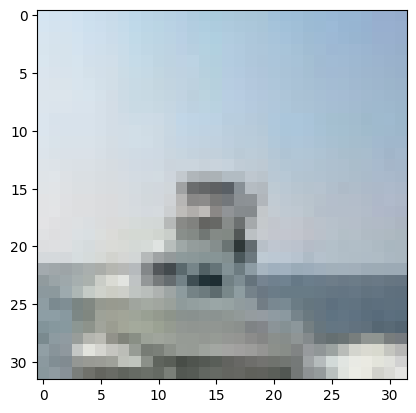

In [5]:
#visualisons
plt.imshow(x_train[100])
print(y_train[100])

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
#Reshapping et normalisation de x_train
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [8]:
#Utilisation du one hot encoding pour transformer les données Y catégoriques en continues
y_train = y_train.flatten()
y_test = y_test.flatten()

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [9]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [10]:
# le cifar10 compte les 10 classes suivantes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 3. Modèle CNN

In [11]:
#definition des parametres du modele
batch_size = 32
num_classes = 10
epochs = 50

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

Le modèle contient plusieurs couches superposées. La sortie d’une couche fournit l’entrée de la couche suivante.

Les couches Conv2D sont des convolutions. Chaque filtre (32 dans les deux premières couches convolutives, 64 dans les deux couches convolutives suivantes) transforme une partie de l'image (5x5 dans les deux premières couches Conv2D, 3x3 dans les deux suivantes). La transformation est appliquée à l'ensemble de l'image.

MaxPool2D est un filtre de déséchantillonnage. Il réduit la matrice 2x2 de l'image à un seul pixel avec la valeur maximale de la matrice 2x2. Le but du filtre est de conserver les principales caractéristiques de l'image tout en réduisant sa taille.

Dropout est une couche de régularisation. Dans notre modèle, 25 % des nœuds de la couche sont ignorés de manière aléatoire, ce qui permet au réseau d'apprendre différentes caractéristiques. Cela permet d'éviter l'ajustement excessif.

Relu est un redresseur utilisé pour trouver des non-linéarités dans les données. Si la valeur d'entrée >= 0, renvoie la valeur d'entrée. Si l'entrée est négative, 0 est renvoyé.

Flatten convertit les tenseurs en un vecteur 1D.

Les couches Dense sont un réseau neuronal artificiel (ANN). La dernière couche renvoie la probabilité qu'une image appartienne à chaque classe (une pour chaque chiffre).

## 4. Entraînement du Modèle :

In [13]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, weight_decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

tf.keras.optimizers.RMSprop : RMSprop (Root Mean Square Propagation) est un optimiseur adaptatif qui ajuste le taux d'apprentissage de chaque paramètre du modèle.

learning_rate=0.0001 : C'est le taux d'apprentissage initial pour l'optimiseur.

decay=1e-06 : C'est le taux de décroissance du taux d'apprentissage. Cela signifie que le taux d'apprentissage diminuera légèrement après chaque mise à jour, ce qui peut aider à stabiliser l'entraînement dans les dernières étapes.

'categorical_crossentropy' : Cette fonction de perte est utilisée pour les problèmes de classification multiclasse où les étiquettes ont été codées en one-hot. Elle mesure la différence entre les probabilités prédites par le modèle et les vraies étiquettes.

'acc' : C'est la précision de classification. Elle mesure le pourcentage d'images qui sont correctement classifiées par le modèle.

In [14]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
1563/1563 [==============================] - 21s 6ms/step - loss: 1.8372 - acc: 0.3251
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5109 - acc: 0.4527
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3671 - acc: 0.5095
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2697 - acc: 0.5485
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1897 - acc: 0.5784
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1185 - acc: 0.6045
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0564 - acc: 0.6268
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0070 - acc: 0.6457
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9621 - acc: 0.6629
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9229 - acc: 0.6768
Epoch 11/50
1563/1563 [=

## 5. Évaluation du Modèle :

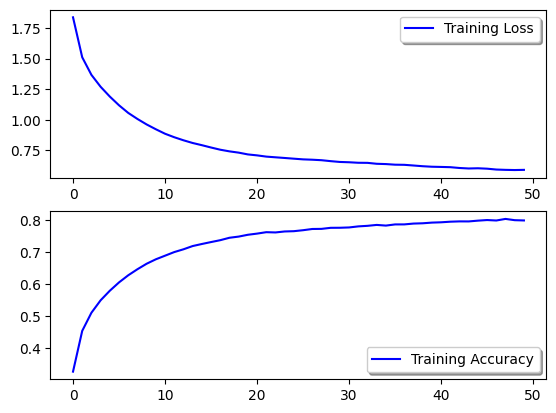

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

L'accuracy augmente avec le temps et le loss baisse avec le temps.

Cependant, la précision de notre ensemble de validation semble baisser légèrement vers la fin, même si la précision de l'entraînement a augmenté.

L'exécution du modèle pendant un plus grand nombre d'époques pourrait rendre notre modèle susceptible d'être overfitté.

In [16]:
#Predictions
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6196 - acc: 0.7970


Notre modèle fonctionne assez bien, avec une précision de ~80% sur nos données de test.

### Matrice de confusion

In [17]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 1s 3ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

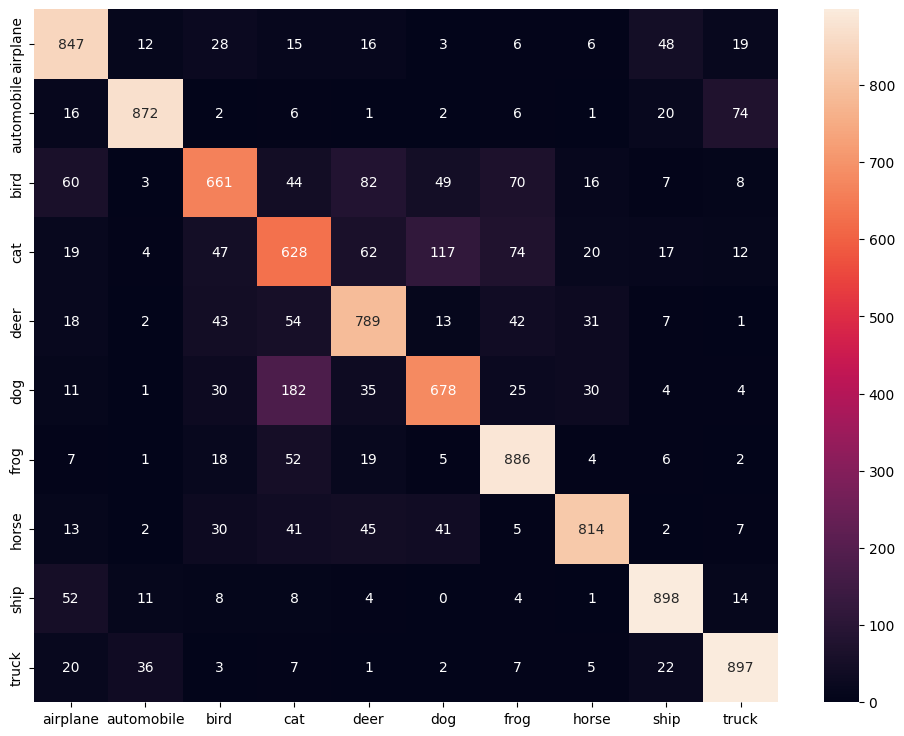

In [18]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

Nous constatons que notre modèle classe assez bien les navires (ship), puisque 898 des 1000 images de navires ont été classées correctement.
Nous constatons également que la confusion entre les chats et les chiens est relativement importante.

## 6. Amélioration du Modèle :

Voici quelques suggestions pour améliorer les performances de notre modèle CNN :

Réglage des Hyperparamètres :

On peut essayer différents taux d'apprentissage, batch sizes, et optimiseurs. On peut également envisager d'utiliser des méthodes de recherche d'hyperparamètres comme la recherche aléatoire ou la recherche par grille.

Utilisation de Batch Normalization :

La normalisation par lots peut aider à accélérer l'entraînement et à stabiliser la convergence. Nous pouvons ajouter des couches de normalisation par lots après les couches de convolution et avant les fonctions d'activation.

Régularisation :

En plus du dropout, on peut envisager d'utiliser la régularisation L1 ou L2 sur les couches denses pour éviter le surapprentissage.

Early Stopping :

Utilisez l'arrêt précoce pour arrêter l'entraînement lorsque la performance sur l'ensemble de validation ne s'améliore plus. Cela peut aider à éviter le surapprentissage et à économiser du temps d'entraînement.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=521fd021-a974-47d3-ab9d-6732ce431fd7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>